In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
sys.path.insert(0, "../0.data-download/scripts/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data
dfs_test, dfs, data = load_train_test_data(
    data_directory, train_or_test="all", load_gene_stats=False
)

In [4]:
# set a unique dataframe that can be appended from
training_df_age = dfs

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_dependency_df = pd.DataFrame()
ped_dependency_df = pd.DataFrame()
for name, training_df_age in groups:

    # append rows that contain Adult samples (male or female) to the new adult dependency dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_dependency_df = adult_dependency_df.append(training_df_age)
        adult_dependency_df = adult_dependency_df.reset_index(drop=True)

    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else:
        ped_dependency_df = ped_dependency_df.append(training_df_age)
        ped_dependency_df = ped_dependency_df.reset_index(drop=True)

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = dfs

# group by sex and create new dataframes to be appended to
groups_sex = training_df_sex.groupby("age_and_sex")
male_dependency_df = pd.DataFrame()
female_dependency_df = pd.DataFrame()
for name, training_df_sex in groups_sex:

    # append rows that contain Male samples (Adult or Pediatric) to the new male dependency dataframe and filter out samples that contain no gender info
    if (
        name == "Adult_Male"
        or name == "Pediatric_Male"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        male_dependency_df = male_dependency_df.append(training_df_sex)
        male_dependency_df = male_dependency_df.reset_index(drop=True)

    # append rows that contain Female samples (Adult or Pediatric) to the new female dependency dataframe and filter out samples that contain no gender info
    elif (
        name == "Adult_Female"
        or name == "Pediatric_Female"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        female_dependency_df = female_dependency_df.append(training_df_sex)
        female_dependency_df = female_dependency_df.reset_index(drop=True)

In [6]:
print(adult_dependency_df.shape)
adult_dependency_df.head(3)

(116, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000093,0.058430,0.015534,0.071652,0.023177,0.012828,0.095276,0.008831,0.020033,0.022787,...,0.553713,0.077384,0.000973,0.124351,0.007373,0.139482,0.012323,0.054630,0.065820,Adult_Female
1,ACH-000466,0.035421,0.032746,0.059176,0.012460,0.050787,0.098240,0.022789,0.139331,0.020577,...,0.075277,0.035980,0.228565,0.051154,0.064304,0.070576,0.033370,0.122077,0.376810,Adult_Female
2,ACH-000879,0.024952,0.032106,0.000598,0.100113,0.057468,0.020576,0.014954,0.023536,0.010395,...,0.855408,0.018970,0.004428,0.013974,0.031943,0.032279,0.364442,0.074584,0.321179,Adult_Female


In [7]:
print(ped_dependency_df.shape)
ped_dependency_df.head(3)

(21, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001618,0.032596,0.122889,0.014340,0.031636,0.046737,0.009210,0.000180,0.010471,0.029809,...,0.057778,0.055671,0.023297,0.022856,0.005854,0.392067,0.062022,0.115471,0.020974,Adult_Unknown
1,ACH-001526,0.008399,0.080331,0.017174,0.010615,0.004528,0.010997,0.023543,0.032630,0.017605,...,0.782568,0.044969,0.028172,0.025302,0.025669,0.202065,0.018975,0.193092,0.852395,Pediatric_Female
2,ACH-001278,0.033567,0.022194,0.074505,0.007281,0.054101,0.019099,0.005641,0.020240,0.041930,...,0.761317,0.022585,0.041464,0.040059,0.024861,0.170951,0.180846,0.865963,0.166964,Pediatric_Female


In [8]:
print(male_dependency_df.shape)
male_dependency_df.head(3)

(77, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000546,0.064647,0.025914,0.002083,0.012991,0.052682,0.019175,0.008907,0.055016,0.000503,...,0.930214,0.004685,0.004116,0.007778,0.008431,0.009745,0.048648,0.014425,0.316514,Adult_Male
1,ACH-000858,0.018527,0.026538,0.006137,0.006890,0.149299,0.048425,0.008978,0.149394,0.010100,...,0.880496,0.014351,0.007648,0.041783,0.022948,0.085439,0.027941,0.070471,0.687072,Adult_Male
2,ACH-001852,0.041150,0.027619,0.006565,0.004003,0.068164,0.047166,0.011839,0.048595,0.017676,...,0.965148,0.005221,0.005943,0.059635,0.051544,0.056816,0.139309,0.098084,0.441039,Adult_Male


In [9]:
print(female_dependency_df.shape)
female_dependency_df.head(3)

(58, 17204)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000093,0.058430,0.015534,0.071652,0.023177,0.012828,0.095276,0.008831,0.020033,0.022787,...,0.553713,0.077384,0.000973,0.124351,0.007373,0.139482,0.012323,0.054630,0.065820,Adult_Female
1,ACH-000466,0.035421,0.032746,0.059176,0.012460,0.050787,0.098240,0.022789,0.139331,0.020577,...,0.075277,0.035980,0.228565,0.051154,0.064304,0.070576,0.033370,0.122077,0.376810,Adult_Female
2,ACH-000879,0.024952,0.032106,0.000598,0.100113,0.057468,0.020576,0.014954,0.023536,0.010395,...,0.855408,0.018970,0.004428,0.013974,0.031943,0.032279,0.364442,0.074584,0.321179,Adult_Female


In [10]:
# drop the string values from all dataframes
adult_dependency_df_float = adult_dependency_df.drop(
    columns=["ModelID", "age_and_sex"]
)
ped_dependency_df_float = ped_dependency_df.drop(columns=["ModelID", "age_and_sex"])

male_dependency_df_float = male_dependency_df.drop(columns=["ModelID", "age_and_sex"])
female_dependency_df_float = female_dependency_df.drop(
    columns=["ModelID", "age_and_sex"]
)

dependency_df = dfs.drop(columns="age_and_sex")
dependency_df = dependency_df.set_index("ModelID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_dependency_df_float, ped_dependency_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ["t_stat", "p_value"]
print(t_test.shape)
t_test.head(3)

(17202, 2)


,t_stat,p_value
0,-0.009519,0.992419
1,0.633236,0.527651
2,0.085723,0.931813


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_dependency_df_float, female_dependency_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ["t_stat", "p_value"]
print(t_test_sex.shape)
t_test_sex.head(3)

(17202, 2)


,t_stat,p_value
0,-0.434772,0.664433
1,1.486642,0.139476
2,-1.178625,0.240652


In [13]:
print(dependency_df.shape)
dependency_df.head(3)

(137, 17202)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000093,0.058430,0.015534,0.071652,0.023177,0.012828,0.095276,0.008831,0.020033,0.022787,0.008327,...,0.025322,0.553713,0.077384,0.000973,0.124351,0.007373,0.139482,0.012323,0.054630,0.065820
ACH-000546,0.064647,0.025914,0.002083,0.012991,0.052682,0.019175,0.008907,0.055016,0.000503,0.016021,...,0.267511,0.930214,0.004685,0.004116,0.007778,0.008431,0.009745,0.048648,0.014425,0.316514
ACH-000858,0.018527,0.026538,0.006137,0.006890,0.149299,0.048425,0.008978,0.149394,0.010100,0.004555,...,0.051260,0.880496,0.014351,0.007648,0.041783,0.022948,0.085439,0.027941,0.070471,0.687072


In [14]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = dependency_df.var()
variance_list = variance.tolist()
column_names = ["variance"]
variance_df = pd.DataFrame(variance, columns=column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns={"index": "gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(17202, 2)


,gene_ID,variance
0,A1BG (1),0.001874
1,A1CF (29974),0.001856
2,A2M (2),0.000215


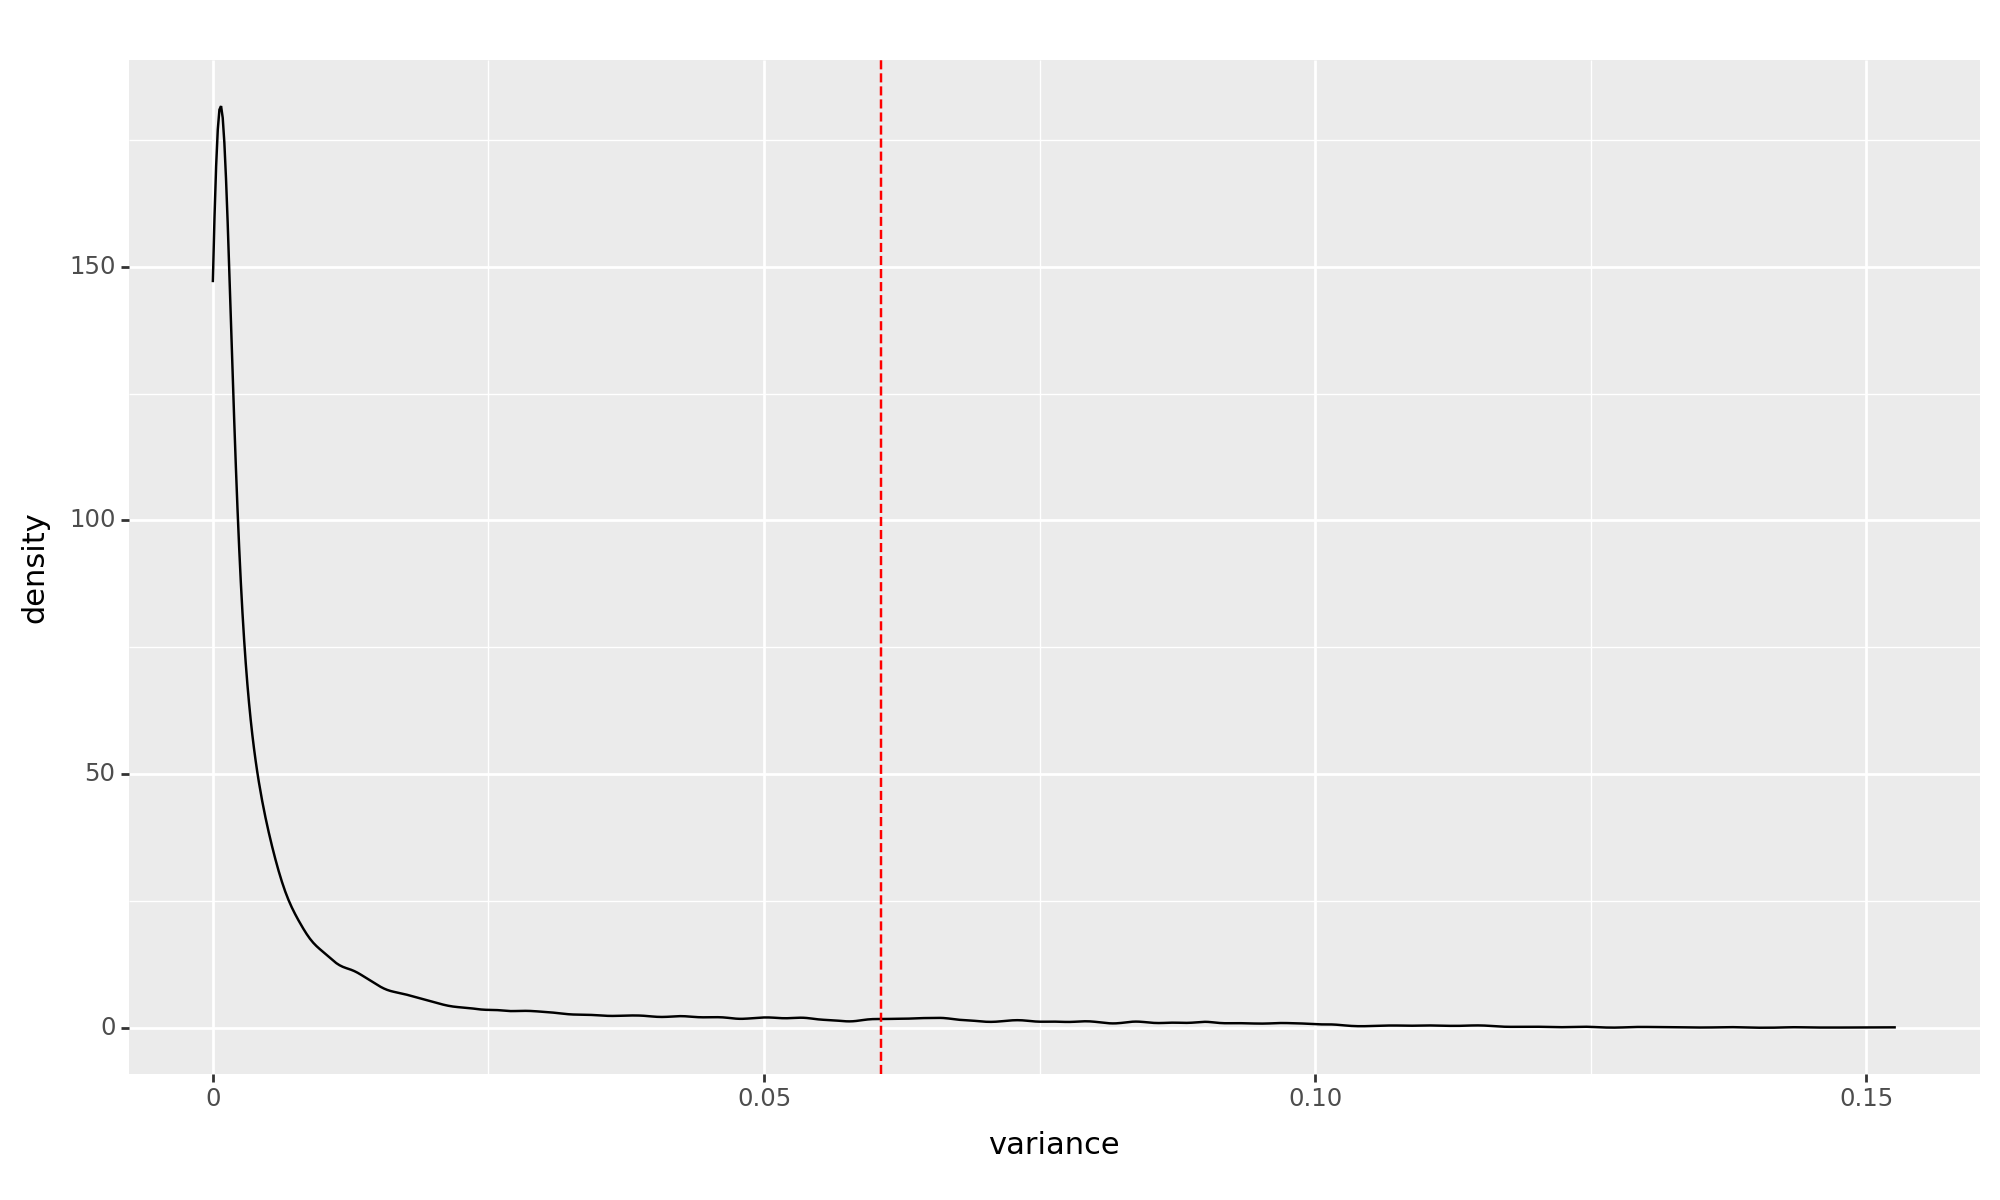

<Figure Size: (1000 x 600)>

In [15]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_theshold = n.astype(float).min()

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (
    p9.ggplot(variance_df, p9.aes(x="variance"))
    + p9.geom_density()
    + p9.geom_vline(xintercept=variance_theshold, linetype="dashed", color="red")
    + p9.theme(figure_size=(10, 6))
)

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [16]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(
    ttest_A_vs_P=t_test.t_stat.astype(float),
    ttest_M_vs_F=t_test_sex.t_stat.astype(float),
)

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path(
    "../0.data-download/data/genes_variances_and_t-tests_df.csv"
)
df.to_csv(testing_df_output, index=False)
print(df.shape)
df.head(3)

(17202, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.001874,-0.009519,-0.434772
1,A1CF (29974),0.001856,0.633236,1.486642
2,A2M (2),0.000215,0.085723,-1.178625


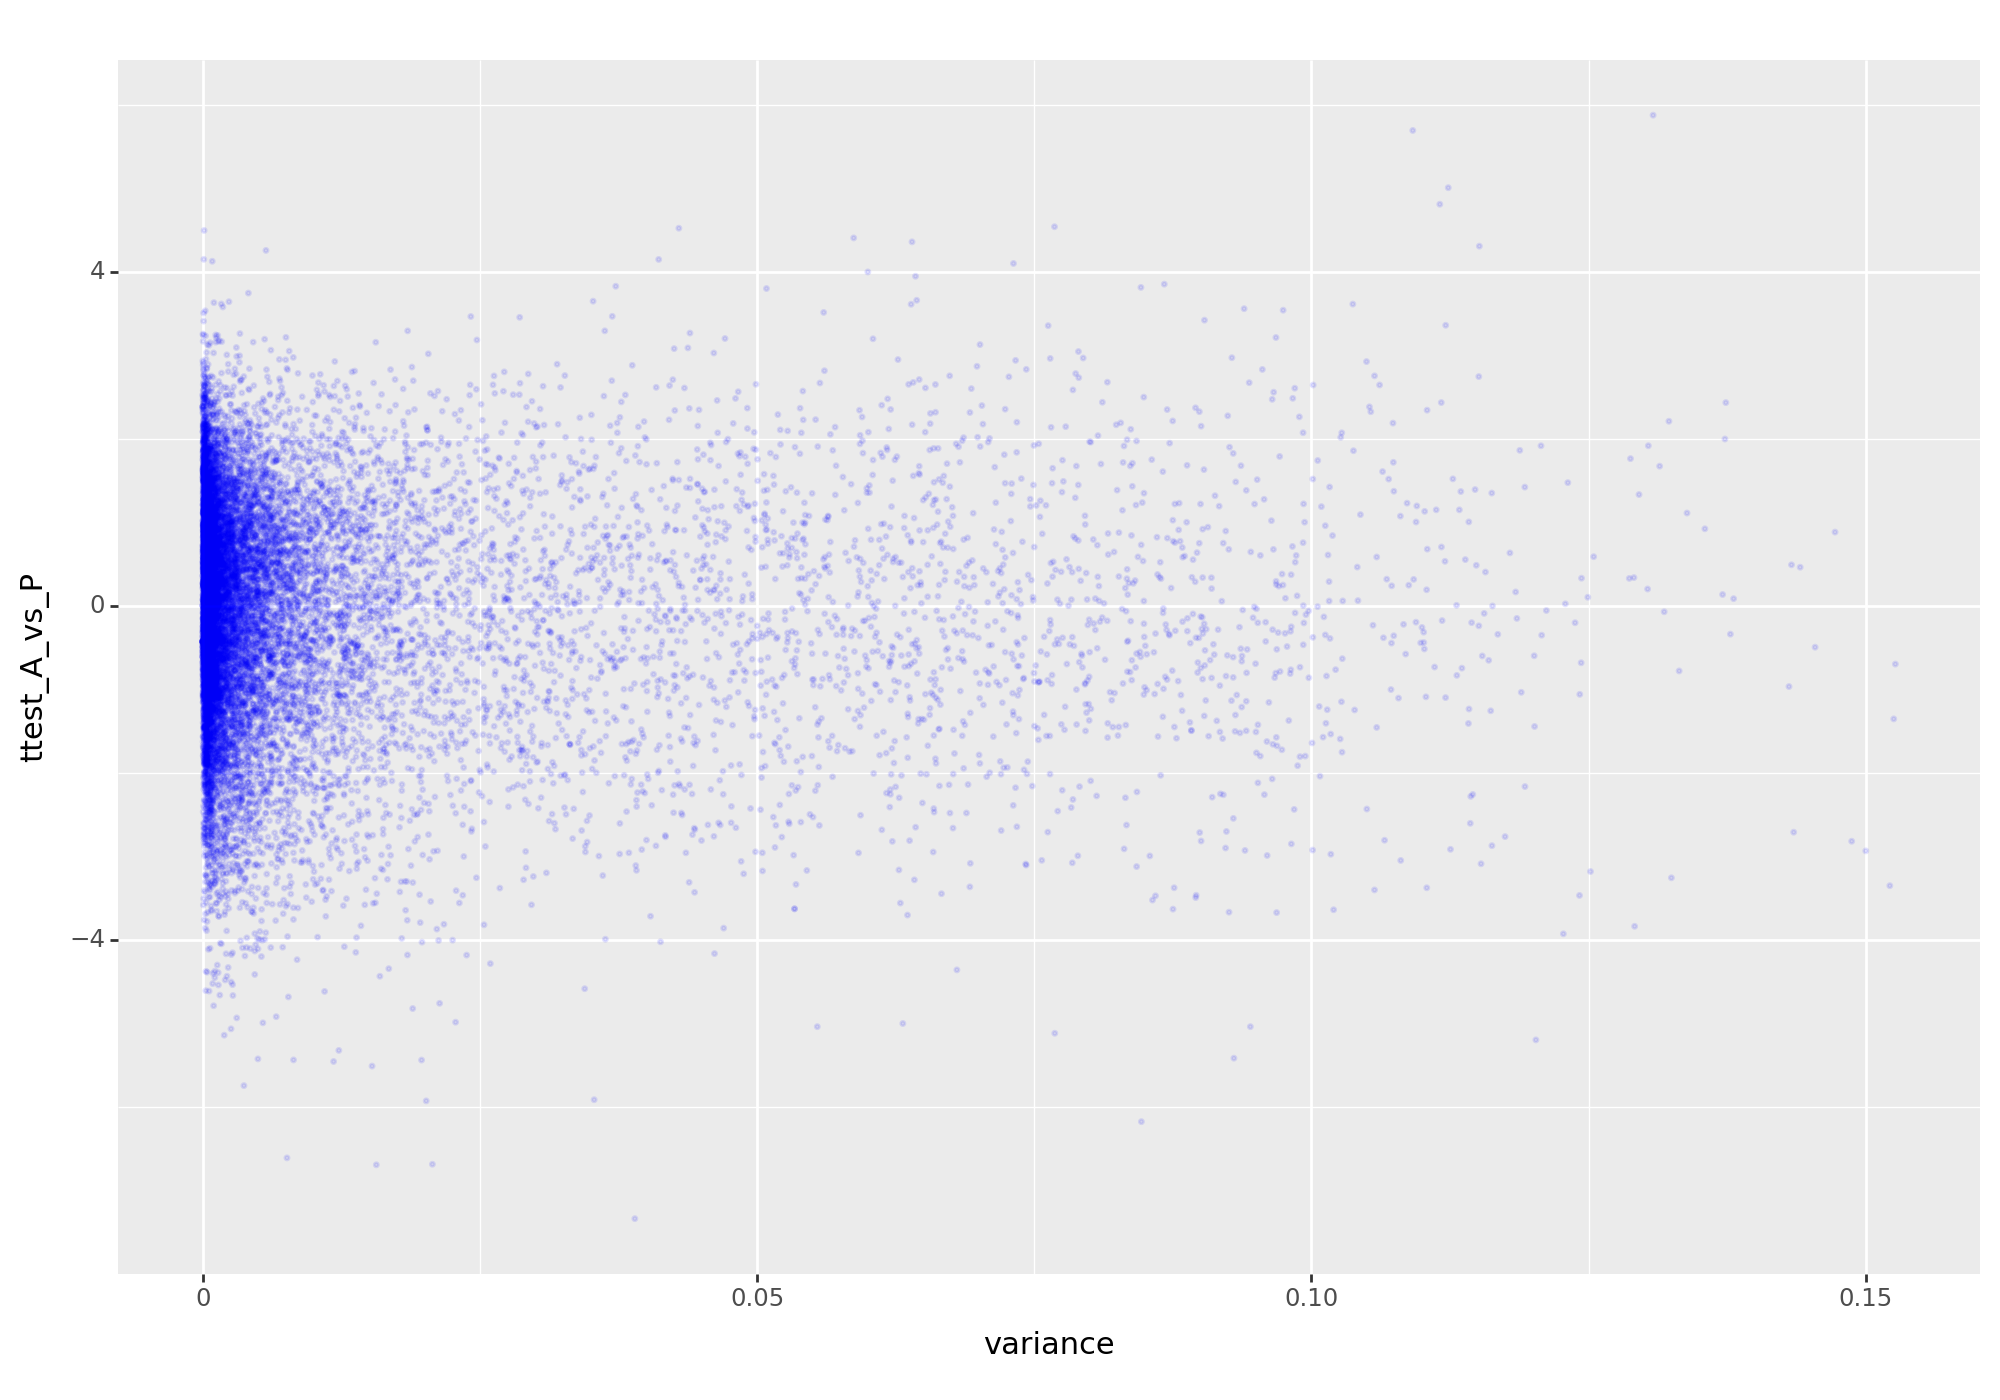

<Figure Size: (1000 x 700)>

In [17]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_A_vs_P"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
adult_vs_pediatric_path = pathlib.Path(
    "./figures/adult-pediatric_ttest_vs_variance.png"
)
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

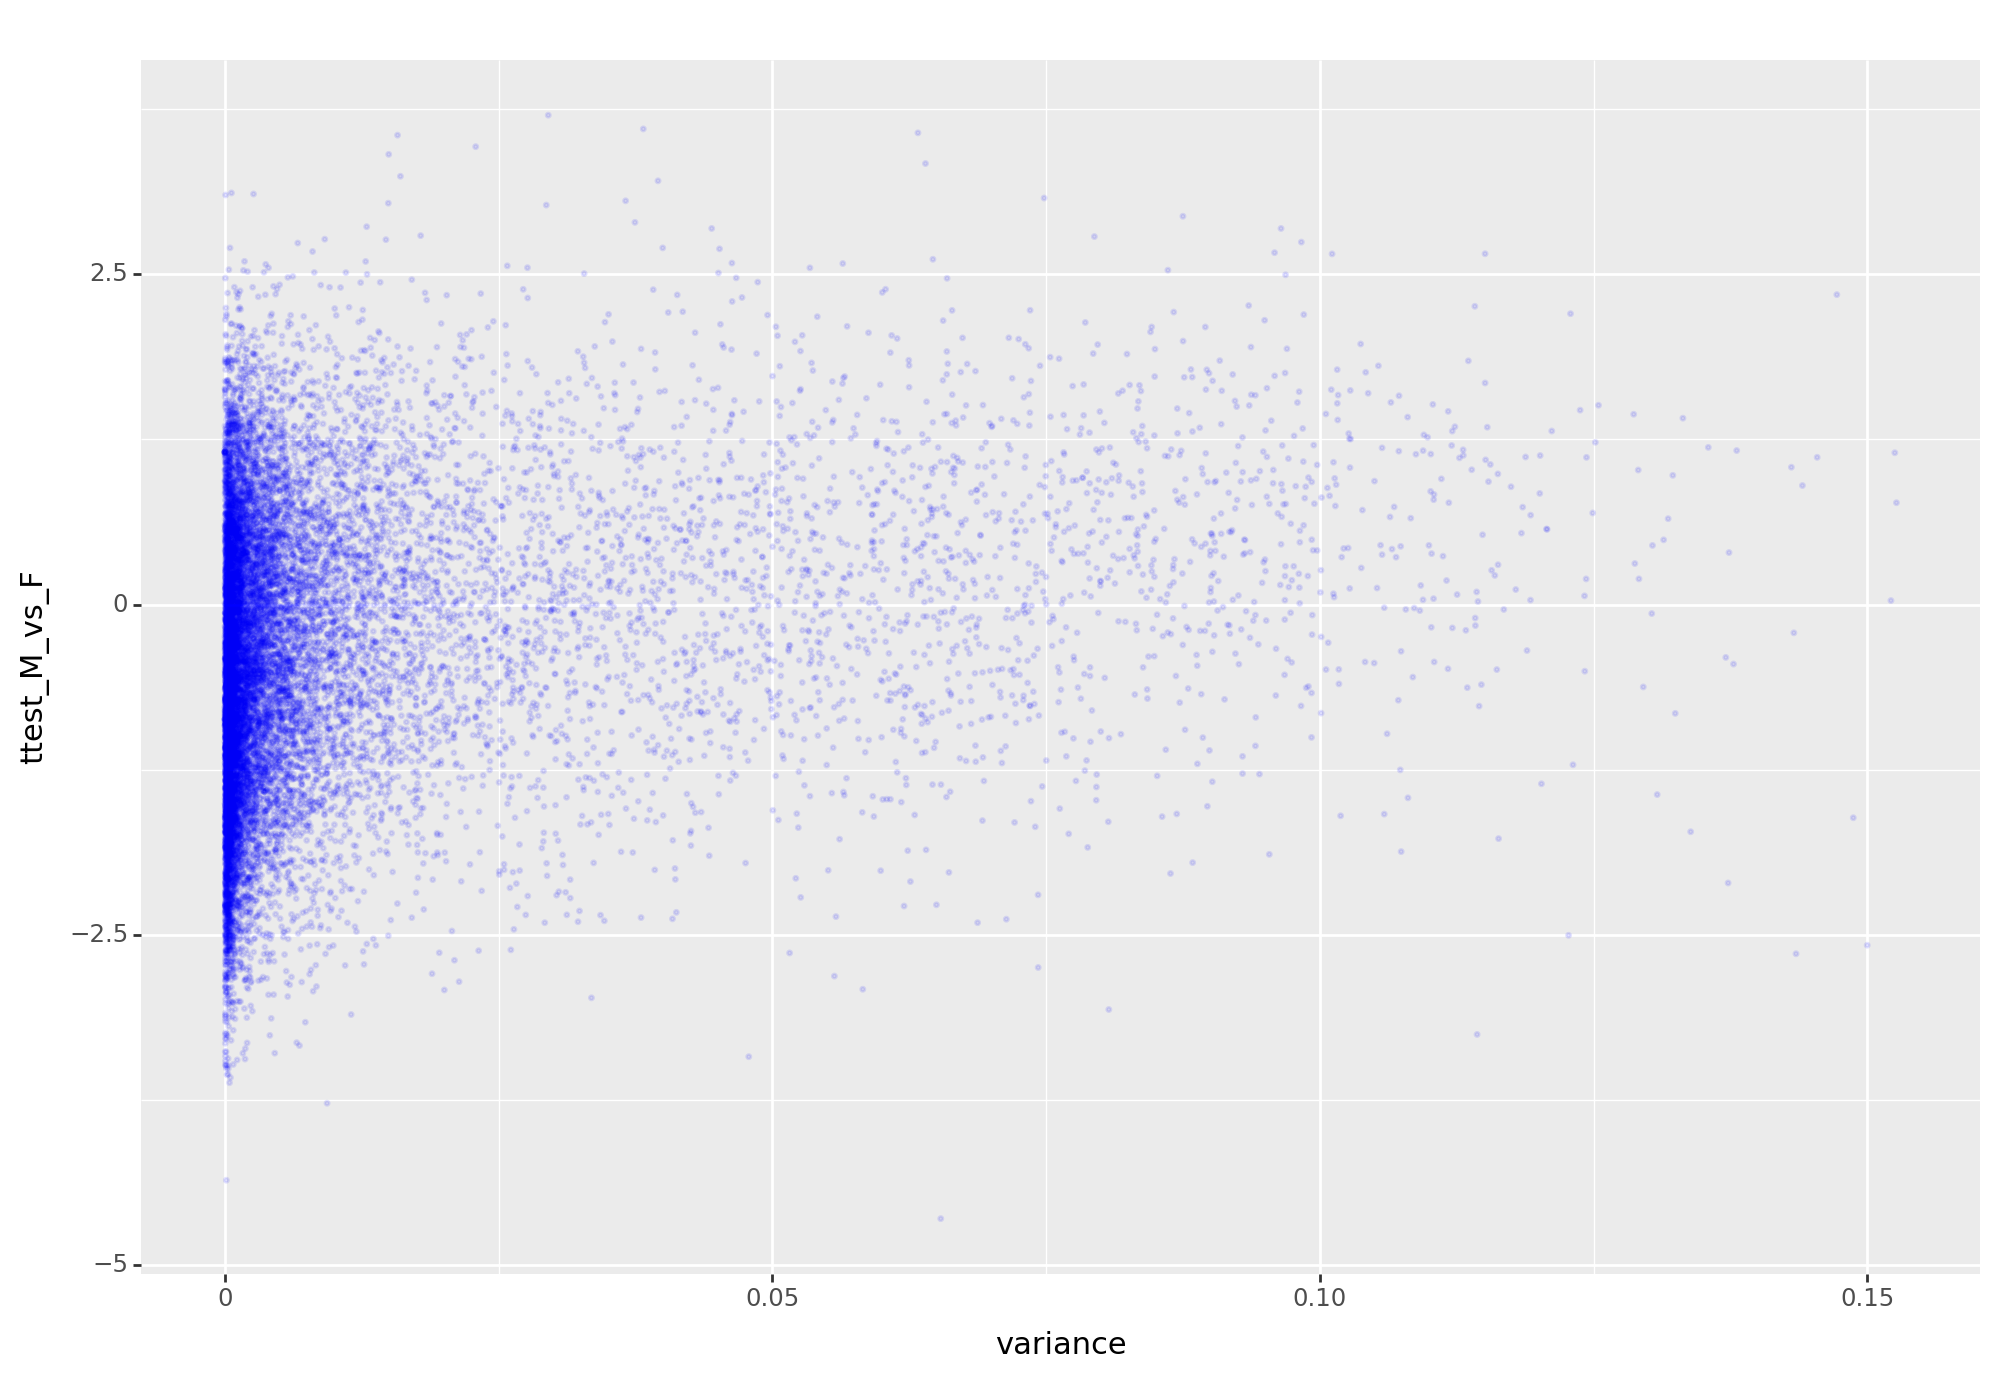

<Figure Size: (1000 x 700)>

In [18]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_M_vs_F"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
)

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot